<a href="https://colab.research.google.com/github/syedanida/Neural-Network/blob/main/4_PyTorchLigthning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### PyTorch Lightning - 3-layer neural network.

In [6]:
!pip install pytorch_lightning

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.3/819.3 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 83.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 46.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 39.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 66.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 931.6/931.6 kB 46.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-c

In [12]:
import torch
import pytorch_lightning as pl
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# Generate synthetic data (non-linear regression problem)
np.random.seed(42)
X = np.random.rand(100, 1).astype(np.float32)  # 100 data points
y = (X**2 + np.random.randn(100, 1) * 0.1).astype(np.float32)  # Quadratic function with noise

In [9]:
# Convert numpy arrays to torch tensors
X_train = torch.from_numpy(X)
y_train = torch.from_numpy(y)

In [13]:
# PyTorch Lightning Model
class LightningNN(pl.LightningModule):
    def __init__(self):
        super(LightningNN, self).__init__()
        # Define the layers
        self.layer1 = torch.nn.Linear(1, 5)  # Input layer to first hidden layer
        self.layer2 = torch.nn.Linear(5, 5)  # First hidden layer to second hidden layer
        self.layer3 = torch.nn.Linear(5, 1)  # Second hidden layer to output layer

    def forward(self, x):
        # Forward pass using ReLU activation function
        x = torch.relu(self.layer1(x))  # Apply ReLU activation after first layer
        x = torch.relu(self.layer2(x))  # Apply ReLU activation after second layer
        x = self.layer3(x)  # Output layer (no activation)
        return x

    def configure_optimizers(self):
        # Configure the optimizer and learning rate scheduler
        optimizer = torch.optim.SGD(self.parameters(), lr=0.01)
        return optimizer

    def training_step(self, batch, batch_idx):
        # Training step: forward pass, compute loss, and return it
        x, y = batch
        y_pred = self(x)
        loss = torch.nn.functional.mse_loss(y_pred, y)
        return loss

    def train_dataloader(self):
        # DataLoader for training data
        dataset = torch.utils.data.TensorDataset(X_train, y_train)
        return torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)

# Instantiate the Lightning model
model = LightningNN()

In [15]:
# PyTorch Lightning Trainer
trainer = pl.Trainer(max_epochs=1000, enable_progress_bar=True, check_val_every_n_epoch=100)

# Train the model
trainer.fit(model)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name   | Type   | Params | Mode 
------------------------------------------
0 | layer1 | Linear | 10     | train
1 | layer2 | Linear | 30     | train
2 | layer3 | Linear | 6      | train
------------------------------------------
46        Trainable params
0         Non-trainable params
46        Total params
0.000     Total estimated model params size (MB)
3         Modules in train mode
0         Modules in eval mode
/usr/local/lib/python3.11/dist-packages/pytorch_lightning/loops/fit_loop.py:310: The number of training batches (4) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=1000` reached.


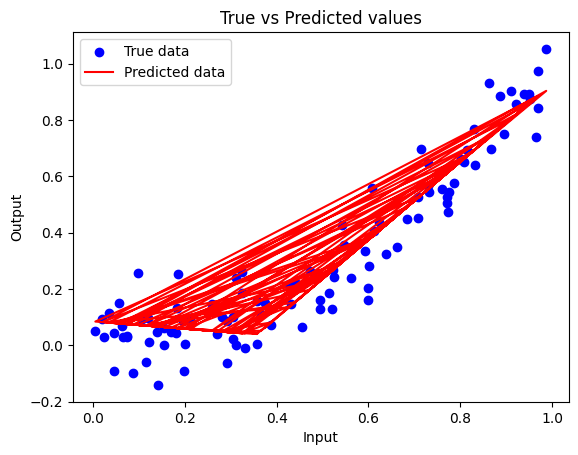

In [16]:
y_pred = model(X_train).detach().numpy()  # Get predictions from model

# Plotting the true vs predicted values
plt.scatter(X, y, color='blue', label='True data')
plt.plot(X, y_pred, color='red', label='Predicted data')
plt.title('True vs Predicted values')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()
plt.show()